In [1]:
# Time Based Learning Rate Decay
from pandas import read_csv
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

import os
os.chdir('C:/deep_learning') # This is where the input dataset is stored
os.getcwd()

Using Theano backend.


'C:\\deep_learning'

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataframe = read_csv("ionosphere.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]
print(X.shape)
print(Y)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
print(Y)

(351, 34)
['g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 

In [3]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [4]:
# Compile model (Time-based Learning Rate Schedule - This is Better!)
#  0.0541 0.0654 if trained with this first
#  0.0264 0.0758 if trained with this second

# The learning rate for stochastic gradient descent has been set to a higher value of 0.1. 
# The model is trained for 50 epochs and the decay argument has been set to 0.002, 
# calculated as 0.1/50. Additionally, it can be a good idea to use momentum when using an 
# adaptive learning rate. In this case we use a momentum value of 0.8.
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
0s - loss: 0.6848 - acc: 0.6298 - val_loss: 0.6542 - val_acc: 0.7500
Epoch 2/50
0s - loss: 0.6427 - acc: 0.7702 - val_loss: 0.5457 - val_acc: 0.9224
Epoch 3/50
0s - loss: 0.5621 - acc: 0.8128 - val_loss: 0.4666 - val_acc: 0.9224
Epoch 4/50
0s - loss: 0.4713 - acc: 0.8340 - val_loss: 0.4340 - val_acc: 0.9310
Epoch 5/50
0s - loss: 0.3882 - acc: 0.8638 - val_loss: 0.2812 - val_acc: 0.9483
Epoch 6/50
0s - loss: 0.3239 - acc: 0.8936 - val_loss: 0.4065 - val_acc: 0.8534
Epoch 7/50
0s - loss: 0.2785 - acc: 0.9064 - val_loss: 0.2143 - val_acc: 0.9655
Epoch 8/50
0s - loss: 0.2451 - acc: 0.9234 - val_loss: 0.1472 - val_acc: 0.9655
Epoch 9/50
0s - loss: 0.2398 - acc: 0.9106 - val_loss: 0.2265 - val_acc: 0.9483
Epoch 10/50
0s - loss: 0.2005 - acc: 0.9362 - val_loss: 0.2429 - val_acc: 0.9310
Epoch 11/50
0s - loss: 0.1887 - acc: 0.9362 - val_loss: 0.1737 - val_acc: 0.9655
Epoch 12/50
0s - loss: 0.1689 - acc: 0.9489 - val_loss: 0.1088 - val_acc

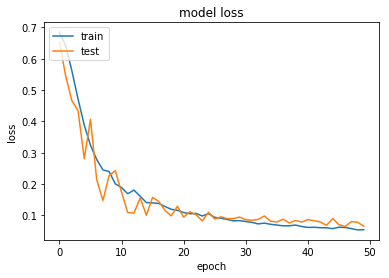

In [5]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
# Drop-Based Learning Rate Decay
import math
from keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [7]:
# Compile model (Drop-based Training Schedule)
# Surprised to see that training would continue from where it was last left off!!
# 0.0493 0.0766 if trained with this first
# 0.0244 0.0762 if trained with this second
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Fit the model
history2 = model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
0s - loss: 0.0531 - acc: 0.9830 - val_loss: 0.1030 - val_acc: 0.9914
Epoch 2/50
0s - loss: 0.0574 - acc: 0.9830 - val_loss: 0.0617 - val_acc: 0.9914
Epoch 3/50
0s - loss: 0.0704 - acc: 0.9787 - val_loss: 0.0508 - val_acc: 0.9828
Epoch 4/50
0s - loss: 0.0704 - acc: 0.9745 - val_loss: 0.0883 - val_acc: 0.9914
Epoch 5/50
0s - loss: 0.0481 - acc: 0.9957 - val_loss: 0.0769 - val_acc: 0.9914
Epoch 6/50
0s - loss: 0.0447 - acc: 0.9872 - val_loss: 0.0736 - val_acc: 0.9914
Epoch 7/50
0s - loss: 0.0432 - acc: 0.9872 - val_loss: 0.0776 - val_acc: 0.9828
Epoch 8/50
0s - loss: 0.0369 - acc: 0.9957 - val_loss: 0.0674 - val_acc: 0.9914
Epoch 9/50
0s - loss: 0.0374 - acc: 0.9957 - val_loss: 0.0675 - val_acc: 0.9914
Epoch 10/50
0s - loss: 0.0332 - acc: 0.9957 - val_loss: 0.0660 - val_acc: 0.9828
Epoch 11/50
0s - loss: 0.0329 - acc: 0.9915 - val_loss: 0.0809 - val_acc: 0.9828
Epoch 12/50
0s - loss: 0.0323 - acc: 0.9915 - val_loss: 0.0709 - val_acc

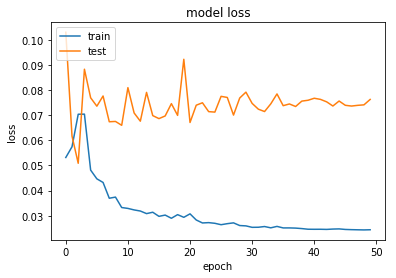

In [8]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()